In [1]:
# Import packages and read data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
%matplotlib inline

In [4]:
raw_data = pd.read_csv('data/king_county_house_data.csv')

pd.set_option('display.max_columns', 21)
raw_data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [21]:
raw_data.shape

(21613, 21)

In [9]:
from geopy.geocoders import Nominatim
def get_city(lat, long):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse(lat+","+long)
    address = location.raw['address']
    city = address.get('city', '')
    town = address.get('town', '')
    if city == '':
        return town
    else:
        return city

In [7]:
get_city(str(47.5427), str(-122.288))

'Seattle'

In [11]:
# Create city column
raw_data['city'] = raw_data.apply(lambda row: get_city(str(row.lat), str(row.long)), axis=1)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=47.7071&lon=-122.301&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f926632cd60>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [3]:
# Change to datetime
raw_data['date'] = raw_data['date'].map(lambda x: x.split('T')[0])
raw_data['date'] = pd.to_datetime(raw_data['date'])

## Baseline Model

In [19]:
raw_data.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
# Data prep and cleaning

# Change to datetime and add month column
raw_data['date'] = raw_data['date'].map(lambda x: x.split('T')[0])
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['month'] = pd.DatetimeIndex(raw_data['date']).month

# Add basement, age, renovated columns
raw_data['basement'] = raw_data['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)
raw_data['age'] = raw_data['date'].dt.year - raw_data['yr_built']
raw_data['renovated'] = raw_data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Change zipcode to string
raw_data['zipcode'] = raw_data['zipcode'].astype(str)

In [ ]:
def get_city2(lat, long):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse(lat+","+long)
    address = location.raw['address']
    city = address.get('city', '')
    town = address.get('town', '')
    if city == '':
        return town
    else:
        return city

In [115]:
def f(x):
    a = x - 1
    b = 2
    return a if True if b if True

SyntaxError: invalid syntax (<ipython-input-115-d3e339217c8b>, line 4)

In [ ]:
get_city2(str(raw_data.loc[2, 'lat']), str(raw_data.loc[2, 'long']))

In [119]:
a = ''
a != True

True

In [ ]:
for i in range(10):
    print(get_city2(str(raw_data.loc[i, 'lat']), str(raw_data.loc[i, 'long'])))

In [14]:
less_than_million = raw_data.loc[(raw_data.price < 1_000_000)]
million_house = raw_data.loc[(raw_data.price >= 1_000_000)]

In [12]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('Map/Incorporated_Areas_of_King_County___city_area.shp')

In [15]:
less_geometry = [Point(xy) for xy in zip(less_than_million['long'], less_than_million['lat'])]

less_df = gpd.GeoDataFrame(less_than_million, crs = 'EPSG:4326', geometry = less_geometry)

In [ ]:
raw_data.lat.max()

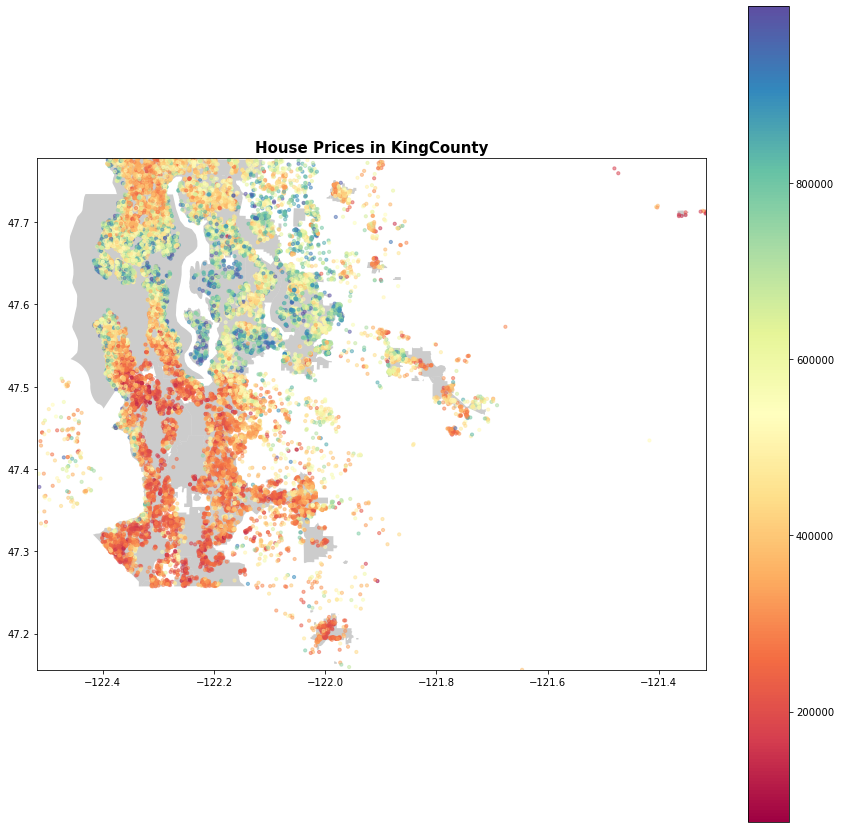

In [16]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.4,color='grey')

less_df.plot(column='price',ax=ax,alpha=0.5, legend=True, markersize=10, cmap='Spectral')

plt.title('House Prices in KingCounty', fontsize=15,fontweight='bold')
# set latitude and longitude boundaries for map display
plt.xlim(raw_data.long.min(),raw_data.long.max())
plt.ylim(raw_data.lat.min(),raw_data.lat.max())
# show map

plt.show()

In [17]:
# designate coordinate system
#crs = {'init':''}
# zip x and y coordinates into single feature
mill_geometry = [Point(xy) for xy in zip(million_house['long'], million_house['lat'])]
# create GeoPandas dataframe
mill_df = gpd.GeoDataFrame(million_house, crs = 'EPSG:4326', geometry = mill_geometry)

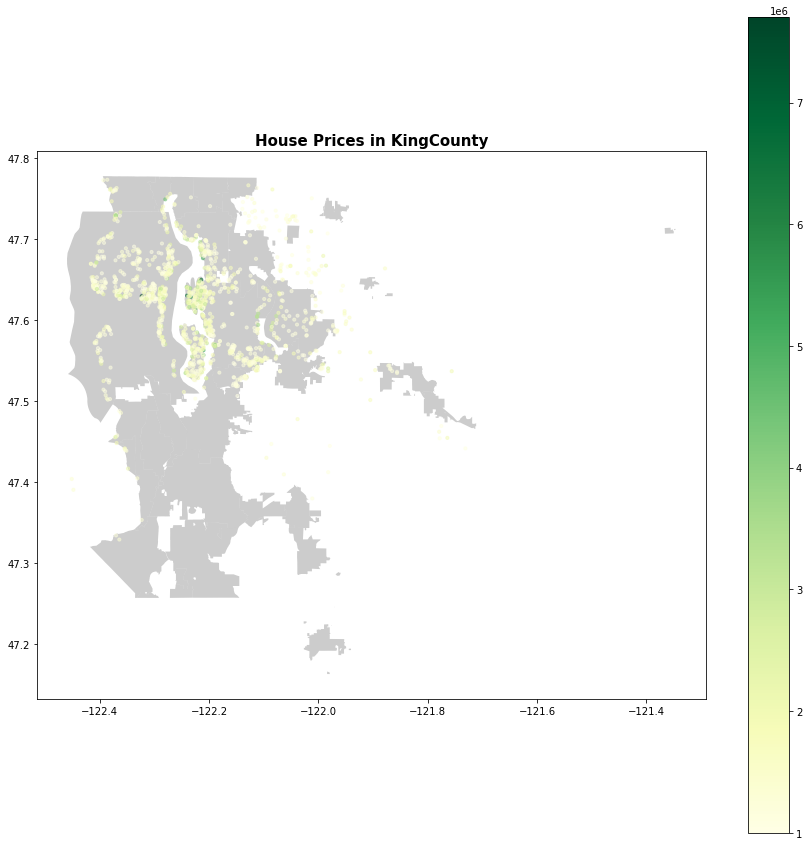

In [18]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.4,color='grey')

mill_df.plot(column='price',ax=ax,alpha=0.5, legend=True, markersize=10, cmap='YlGn')

plt.title('House Prices in KingCounty', fontsize=15,fontweight='bold')
# set latitude and longitude boundaries for map display
# plt.xlim(-74.02,-73.925)
# plt.ylim( 40.7,40.8)
# show map

plt.show()

In [ ]:
raw_data.columns

In [ ]:
clean_data = raw_data.drop(columns=['id', 'sqft_above', 'sqft_basement', 'yr_built',
                          'yr_renovated', 'lat', 'long', 'geometry'])

In [ ]:
plt.figure(figsize=(15,14))
sns.heatmap(clean_data.corr(), annot=True)
plt.show()

In [ ]:
multicol = clean_data.drop(columns='price')

multicol = multicol.corr().abs().stack().reset_index().sort_values(0, ascending=False)

multicol['pairs'] = list(zip(multicol.level_0, multicol.level_1))

multicol.set_index(['pairs'], inplace = True)

multicol.drop(columns=['level_1', 'level_0'], inplace = True)

multicol.columns = ['cc']

multicol.drop_duplicates(inplace=True)

multicol[(multicol.cc>.7) & (multicol.cc <1)]